#Neural Style Transfer

Official Documentation:
https://www.tensorflow.org/tutorials/generative/style_transfer

In the code below, I am taking two of my favourite paintings and using deep learning and tensorflow to visualise how one of them can be made in the style of the other.

The two paintings taken here are:
1. 'The Starry Night' by Vincent van Gogh (1889)
2. 'Girl With A Pearl Earring' by Johannes Vermeer (1665)

The model can be used to adapt an existing work to resemble original aesthetic of any artist as required in the assignment.

In [41]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools

In [42]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [73]:
import cv2
content_path = '/content/Girl_with_a_Pearl_Earring.jpg'
style_path = '/content/Starry_Night.jpg'

In [74]:
def load_img(path_to_img): 
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim
  new_shape = tf.cast(shape * scale, tf.int32)
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [75]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

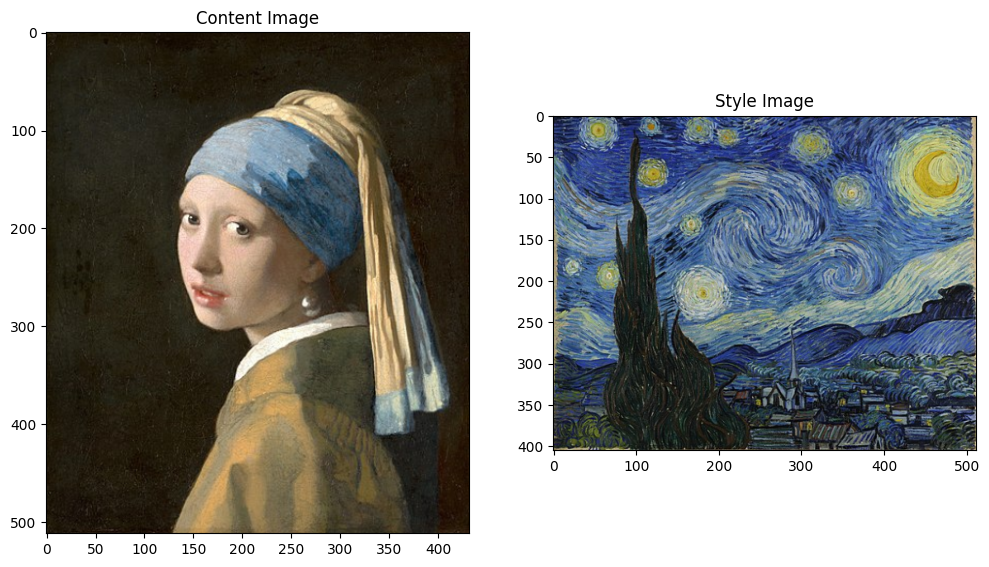

In [76]:
content_image = load_img(content_path)
style_image = load_img(style_path)
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')
plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

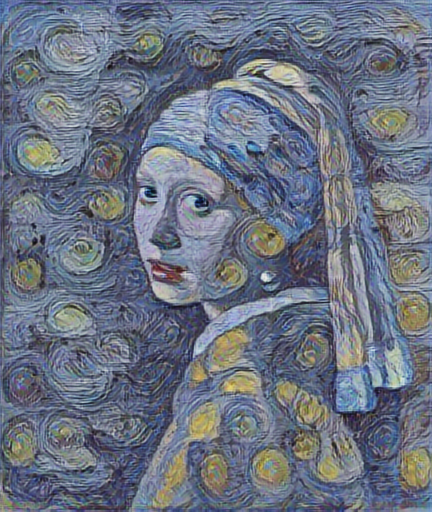

In [77]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

### Pros:


*   The above model is simple to understand and easy to implement. (Guidelines for implementation can be easily found on the official TensorFlow tutorials website.)  
*   The model works quite well for most selection of images and/or paintings with minimal computational cost. (The selection of a work and the frequency of signature artefacts in it, highly affect the quality of the images.)



### Cons:


*   This model produces a lot of high frequency artifacts, as is clear in the above demonstration where the 'Starry Night Spirals' appear with too high frequency in the resultant image.
*   Some bounding components of the content image can be lost completely, such as the half ear and cheek bone boundary of the 'Girl with a Pearl Earring' in the above demonstration.
